In [2]:
import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Sequential, Input
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from scipy import ndimage

In [3]:
# train ra test validation ko lagi imagedatagenerator define garne
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    shear_range=0.15,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=False,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)


In [4]:
#train ra test data lai load garne / preprocessing
img_size = (96, 96)
batch_size = 32

train_generator = train_datagen.flow_from_directory(
    'split_dataset/train',
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    'split_dataset/test',
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)


Found 31969 images belonging to 36 classes.
Found 13702 images belonging to 36 classes.


In [5]:
#model define garne
model = Sequential([
    Input(shape=(img_size[0], img_size[1], 3)),

    Conv2D(32, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dense(train_generator.num_classes, activation='softmax')
])



In [6]:
#model lai compile garne
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [7]:
#model lai train garne
history = model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=10
)

/home/sagar/Code/project-3/.venv/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10


2025-06-13 15:21:21.669802: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 36192256 exceeds 10% of free system memory.


   1/1000 ━━━━━━━━━━━━━━━━━━━━ 30:53 2s/step - accuracy: 0.0312 - loss: 3.6114

2025-06-13 15:21:21.891450: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 36192256 exceeds 10% of free system memory.
2025-06-13 15:21:21.963939: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 36192256 exceeds 10% of free system memory.


   2/1000 ━━━━━━━━━━━━━━━━━━━━ 3:45 226ms/step - accuracy: 0.0234 - loss: 3.9705

2025-06-13 15:21:22.127997: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 36192256 exceeds 10% of free system memory.
2025-06-13 15:21:22.197892: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 36192256 exceeds 10% of free system memory.


1000/1000 ━━━━━━━━━━━━━━━━━━━━ 305s 304ms/step - accuracy: 0.3666 - loss: 2.0347 - val_accuracy: 0.8526 - val_loss: 0.4617
Epoch 2/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 357s 357ms/step - accuracy: 0.7904 - loss: 0.5833 - val_accuracy: 0.9088 - val_loss: 0.2606
Epoch 3/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 380s 380ms/step - accuracy: 0.8716 - loss: 0.3601 - val_accuracy: 0.9387 - val_loss: 0.1689
Epoch 4/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 376s 376ms/step - accuracy: 0.9082 - loss: 0.2638 - val_accuracy: 0.9702 - val_loss: 0.1000
Epoch 5/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 372s 372ms/step - accuracy: 0.9201 - loss: 0.2357 - val_accuracy: 0.9651 - val_loss: 0.1029
Epoch 6/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 373s 373ms/step - accuracy: 0.9365 - loss: 0.1819 - val_accuracy: 0.9771 - val_loss: 0.0700
Epoch 7/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 351s 351ms/step - accuracy: 0.9484 - loss: 0.1457 - val_accuracy: 0.9825 - val_loss: 0.0539
Epoch 8/10
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 357s 357ms/step - accuracy: 0.9

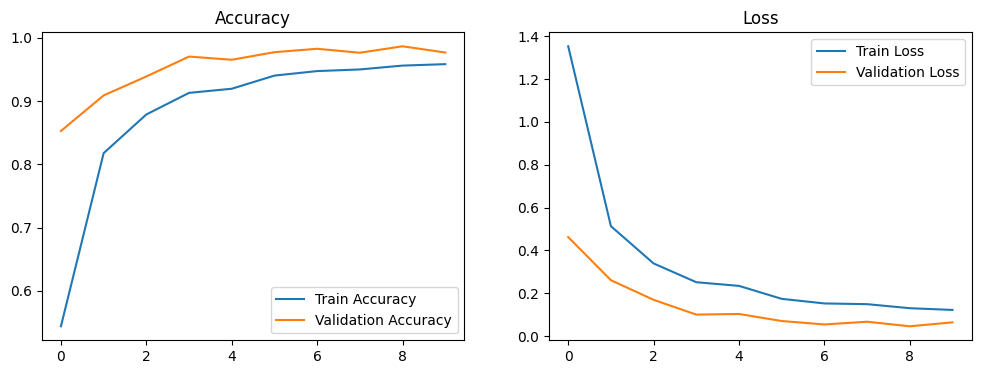

In [9]:
# accuracy ra loss ko graph acc. to train and validation
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')

plt.show()


In [11]:
model.save('NSL_Model.keras')
print("Model saved as NSL_model.keras")


Model saved as NSL_model.keras
